In [1]:
from google.colab import files
uploaded = files.upload()


Saving 45.jpg to 45.jpg


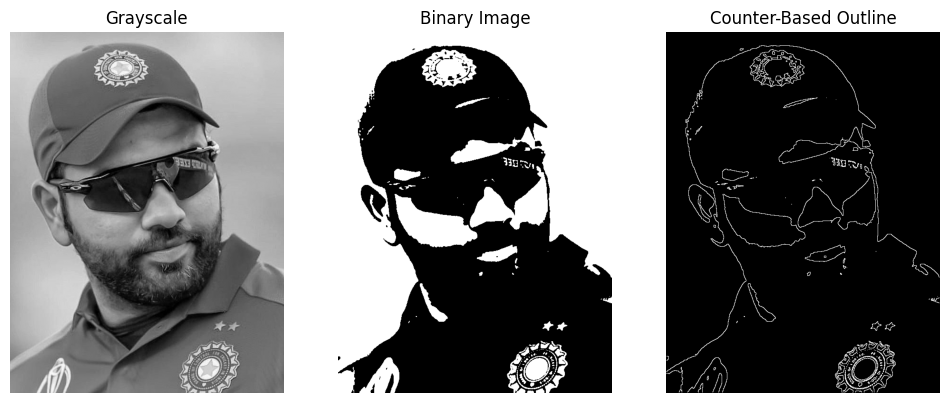

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read uploaded image
image = cv2.imread('45.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply blur (reduces noise)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Convert to binary (automatic threshold)
_, binary = cv2.threshold(blur, 0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create empty boundary image
boundary = np.zeros_like(binary)

rows, cols = binary.shape

# 8-neighborhood directions
neighbors = [(-1,-1),(-1,0),(-1,1),
             (0,-1),(0,1),
             (1,-1),(1,0),(1,1)]

# Counter-based outline detection
for i in range(1, rows-1):
    for j in range(1, cols-1):

        if binary[i,j] == 255:   # Foreground pixel

            counter = 0

            for dx,dy in neighbors:
                if binary[i+dx, j+dy] == 0:
                    counter += 1

            if counter > 0:
                boundary[i,j] = 255

# Display results
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(boundary, cmap='gray')
plt.title("Counter-Based Outline")
plt.axis('off')

plt.show()
